In [10]:
import pandas as pd

# import csv
df = pd.read_csv("run_results.csv")
print(df)

# compute summary statistics
grouped = df.groupby("task")["score"]

print(grouped.describe())

  task  seed     score
0  rte     0  0.877256
1  rte     1  0.851986
2  rte     2  0.855596
3  rte     3  0.848375
4  rte     4  0.841155
      count      mean       std       min       25%       50%       75%  \
task                                                                      
rte     5.0  0.854874  0.013604  0.841155  0.848375  0.851986  0.855596   

           max  
task            
rte   0.877256  


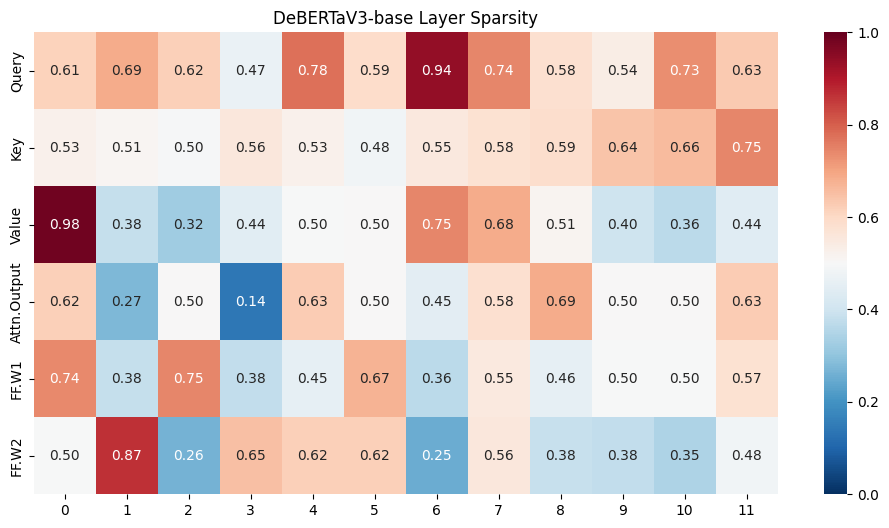

In [6]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# raw log lines (replace with your full list)
log_lines = """
:     eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity 0.62061
wandb:    eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity 0.52734
wandb:  eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity 0.61353
wandb:  eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity 0.98492
wandb:         eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity 0.74188
wandb:               eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity 0.49817
wandb:     eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity 0.27399
wandb:    eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity 0.50903
wandb:  eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity 0.68652
wandb:  eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity 0.38013
wandb:         eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity 0.38147
wandb:               eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity 0.86676
wandb:    eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity 0.50116
wandb:   eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity 0.65771
wandb: eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity 0.73413
wandb: eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity 0.36426
wandb:        eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity 0.49768
wandb:              eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity 0.34662
wandb:    eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity 0.62793
wandb:   eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity 0.74609
wandb: eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity 0.6311
wandb: eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity 0.43756
wandb:        eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity 0.57434
wandb:              eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity 0.48431
wandb:     eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity 0.5011
wandb:    eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity 0.49585
wandb:  eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity 0.62109
wandb:  eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity 0.32172
wandb:         eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity 0.7453
wandb:               eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity 0.26337
wandb:     eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity 0.13837
wandb:    eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity 0.55835
wandb:  eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity 0.46655
wandb:  eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity 0.44269
wandb:         eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity 0.37781
wandb:               eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity 0.65137
wandb:     eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity 0.62634
wandb:    eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity 0.52686
wandb:  eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity 0.77563
wandb:  eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity 0.49945
wandb:         eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity 0.45355
wandb:               eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity 0.62085
wandb:     eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity 0.50244
wandb:    eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity 0.48169
wandb:  eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity 0.59204
wandb:  eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity 0.50043
wandb:         eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity 0.67401
wandb:               eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity 0.61896
wandb:     eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity 0.44629
wandb:    eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity 0.55444
wandb:  eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity 0.94067
wandb:  eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity 0.74567
wandb:         eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity 0.36438
wandb:               eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity 0.25336
wandb:     eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity 0.58124
wandb:    eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity 0.57617
wandb:  eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity 0.74487
wandb:  eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity 0.68378
wandb:         eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity 0.5495
wandb:               eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity 0.55634
wandb:     eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity 0.68628
wandb:    eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity 0.58984
wandb:  eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity 0.57983
wandb:  eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity 0.51306
wandb:         eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity 0.45624
wandb:               eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity 0.38458
wandb:     eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity 0.50012
wandb:    eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity 0.64111
wandb:  eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity 0.53857
wandb:  eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity 0.39569
wandb:         eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity 0.49823
wandb:               eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity 0.37714
wandb:                                       eval/base_model.model.pooler.dense/sparsity 0.625
""".strip().splitlines()

# mapping to friendly names
module_map = {
    "attention.self.query_proj": "Query",
    "attention.self.key_proj": "Key",
    "attention.self.value_proj": "Value",
    "attention.output.dense": "Attn.Output",
    "intermediate.dense": "FF.W1",
    "output.dense": "FF.W2",
}

# regex
pattern = re.compile(r"layer\.(\d+)\.(.*?)/sparsity ([0-9.]+)")

data = []
for line in log_lines:
    m = pattern.search(line)
    if m:
        layer, module, val = m.groups()
        if module in module_map:
            data.append((int(layer), module_map[module], float(val)))

df = pd.DataFrame(data, columns=["layer", "module", "sparsity"])

# pivot to matrix: rows = modules, cols = layers
heatmap_df = df.pivot(index="module", columns="layer", values="sparsity")

# reorder rows like your figure
row_order = ["Query", "Key", "Value", "Attn.Output", "FF.W1", "FF.W2"]
heatmap_df = heatmap_df.reindex(row_order)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_df,
    annot=True, fmt=".2f",
    cmap="RdBu_r",
    vmin=0, vmax=1,  # sparsity is 0–1
)
plt.title("DeBERTaV3-base Layer Sparsity")
# hide x and y labels
plt.xlabel("")
plt.ylabel("")
plt.show()
